In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from matplotlib.axes._axes import _log as matplotlib_axes_logger

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
matplotlib_axes_logger.setLevel('ERROR')
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 16, 8

In [3]:
file_path = 'eda_ts_data.csv'

In [4]:
ts = pd.read_csv(file_path)
ts["ds"] = pd.to_datetime(ts["ds"])

In [5]:
ts.shape

(204, 2)

In [7]:
ts.head(10)

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
5,1991-12-01,4.306371
6,1992-01-01,5.088335
7,1992-02-01,2.814520
8,1992-03-01,2.985811
9,1992-04-01,3.204780


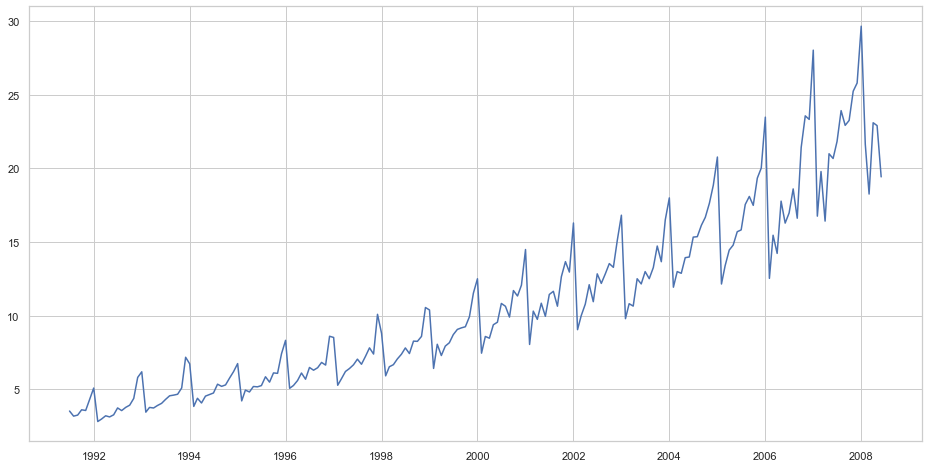

In [8]:
plt.plot(ts["ds"], ts["y"])

In [9]:
ts["year"] = ts["ds"].dt.year
ts["month"] = ts["ds"].dt.strftime('%b')
ts.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


In [10]:
ts.set_index('ds', inplace=True)

In [11]:
ts = ts.loc['1992-01-01': '2007-12-31']

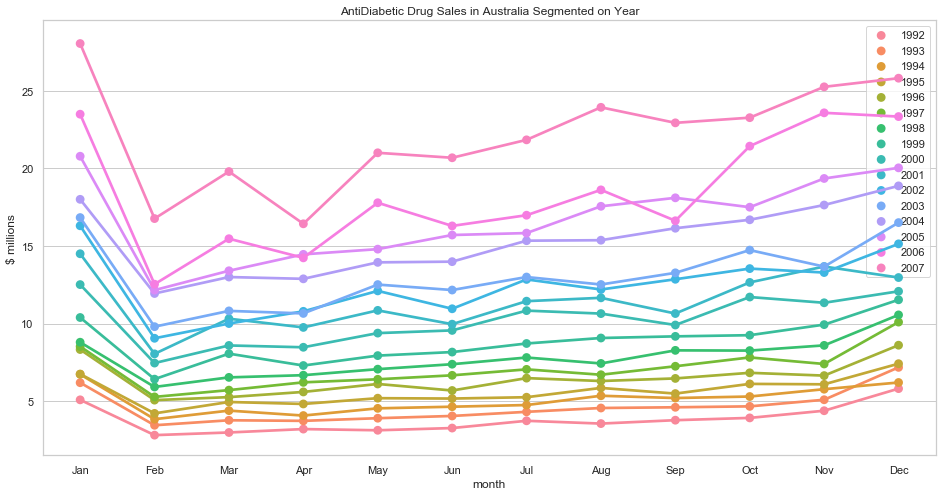

In [12]:
sns.pointplot(x="month", y="y", hue="year", data=ts)
plt.xlabel("month")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia Segmented on Year")
plt.legend(loc='upper right')

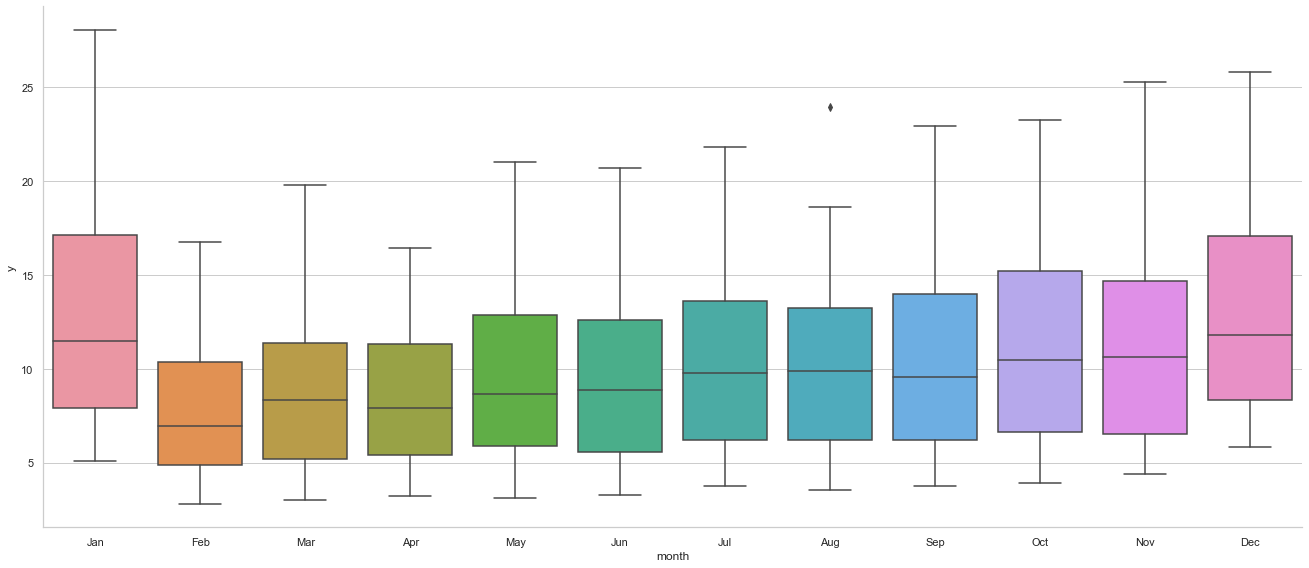

In [13]:
sns.factorplot(x="month", y="y", data=ts, kind="box", size=8, aspect=float(16/7))

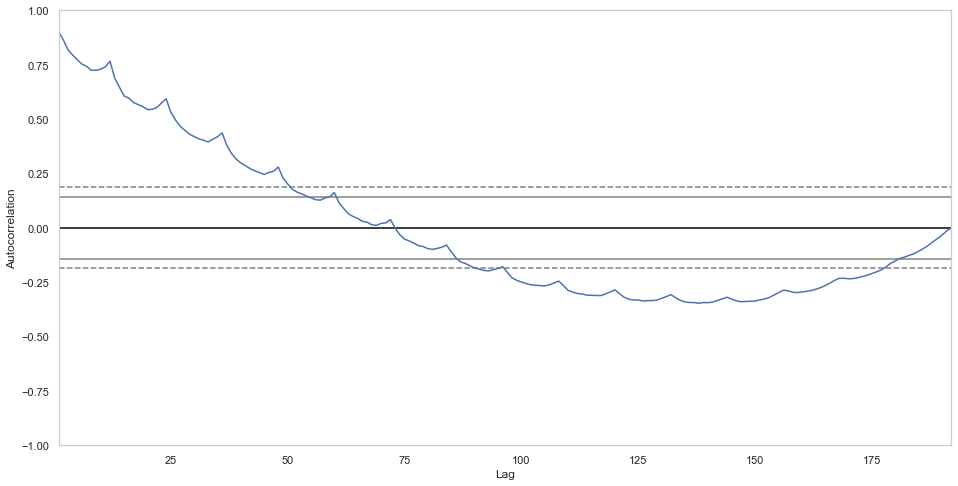

In [14]:
autocorrelation_plot(ts["y"])

In [15]:
orig_series = ts['y'].values
ts['y_flipped'] = orig_series[::-1]

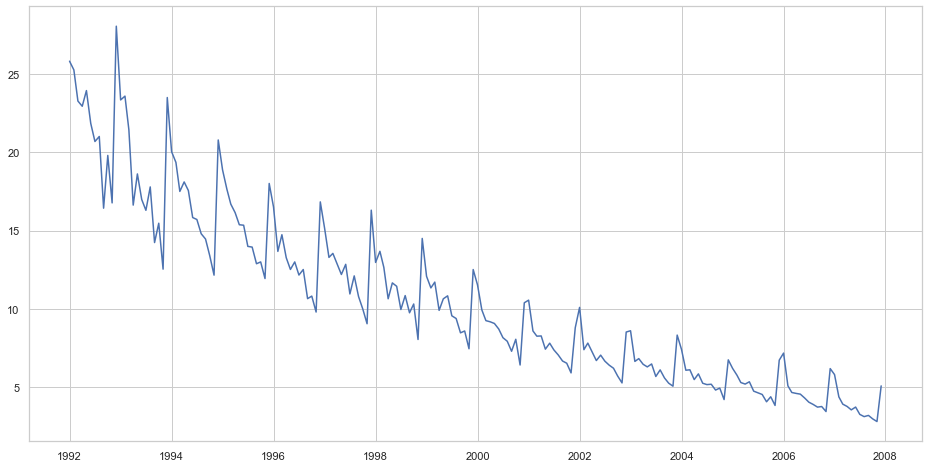

In [16]:
plt.plot(ts['y_flipped'])

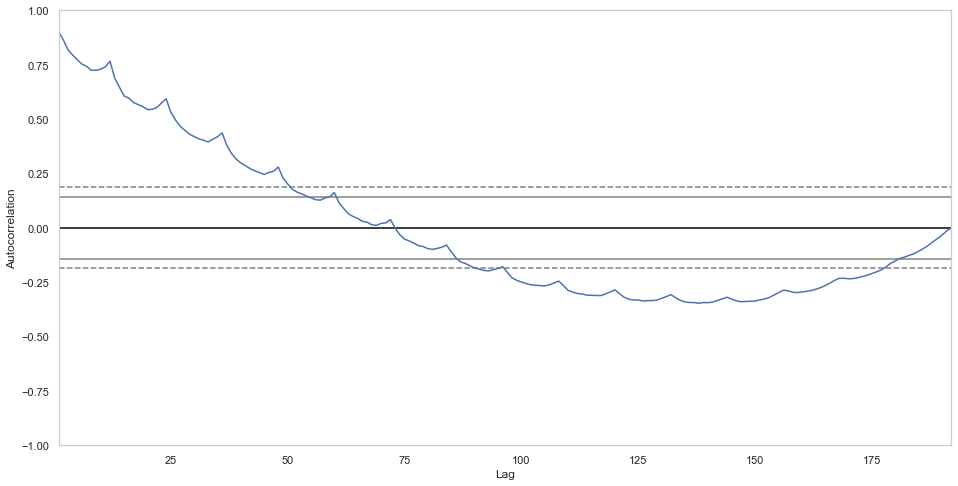

In [17]:
plt.figure(figsize=(16, 8))
autocorrelation_plot(ts["y_flipped"])

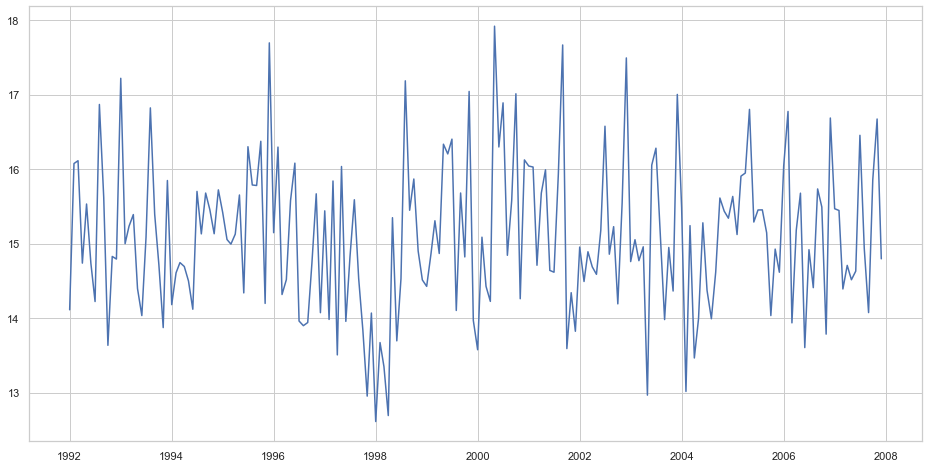

In [18]:
ts['level_series'] = np.random.normal(15, 1, 192)
plt.plot(ts['level_series'])

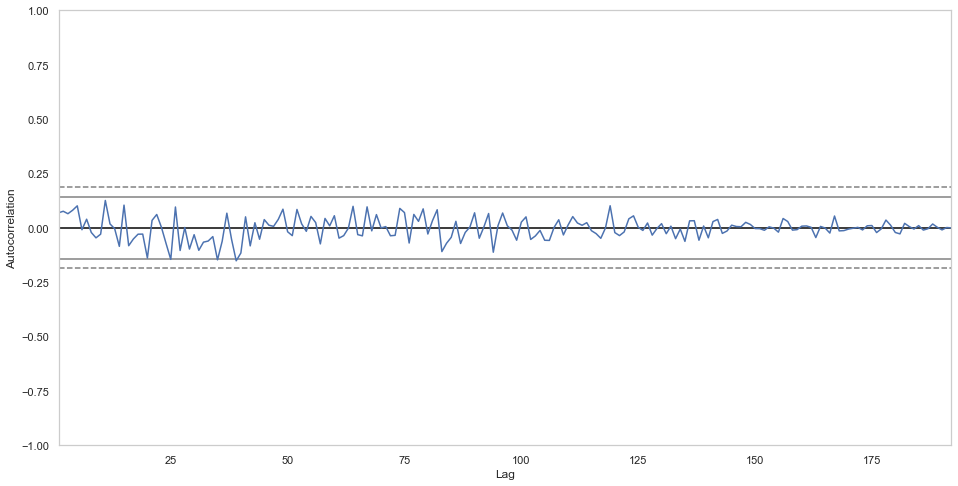

In [19]:
autocorrelation_plot(ts["level_series"])

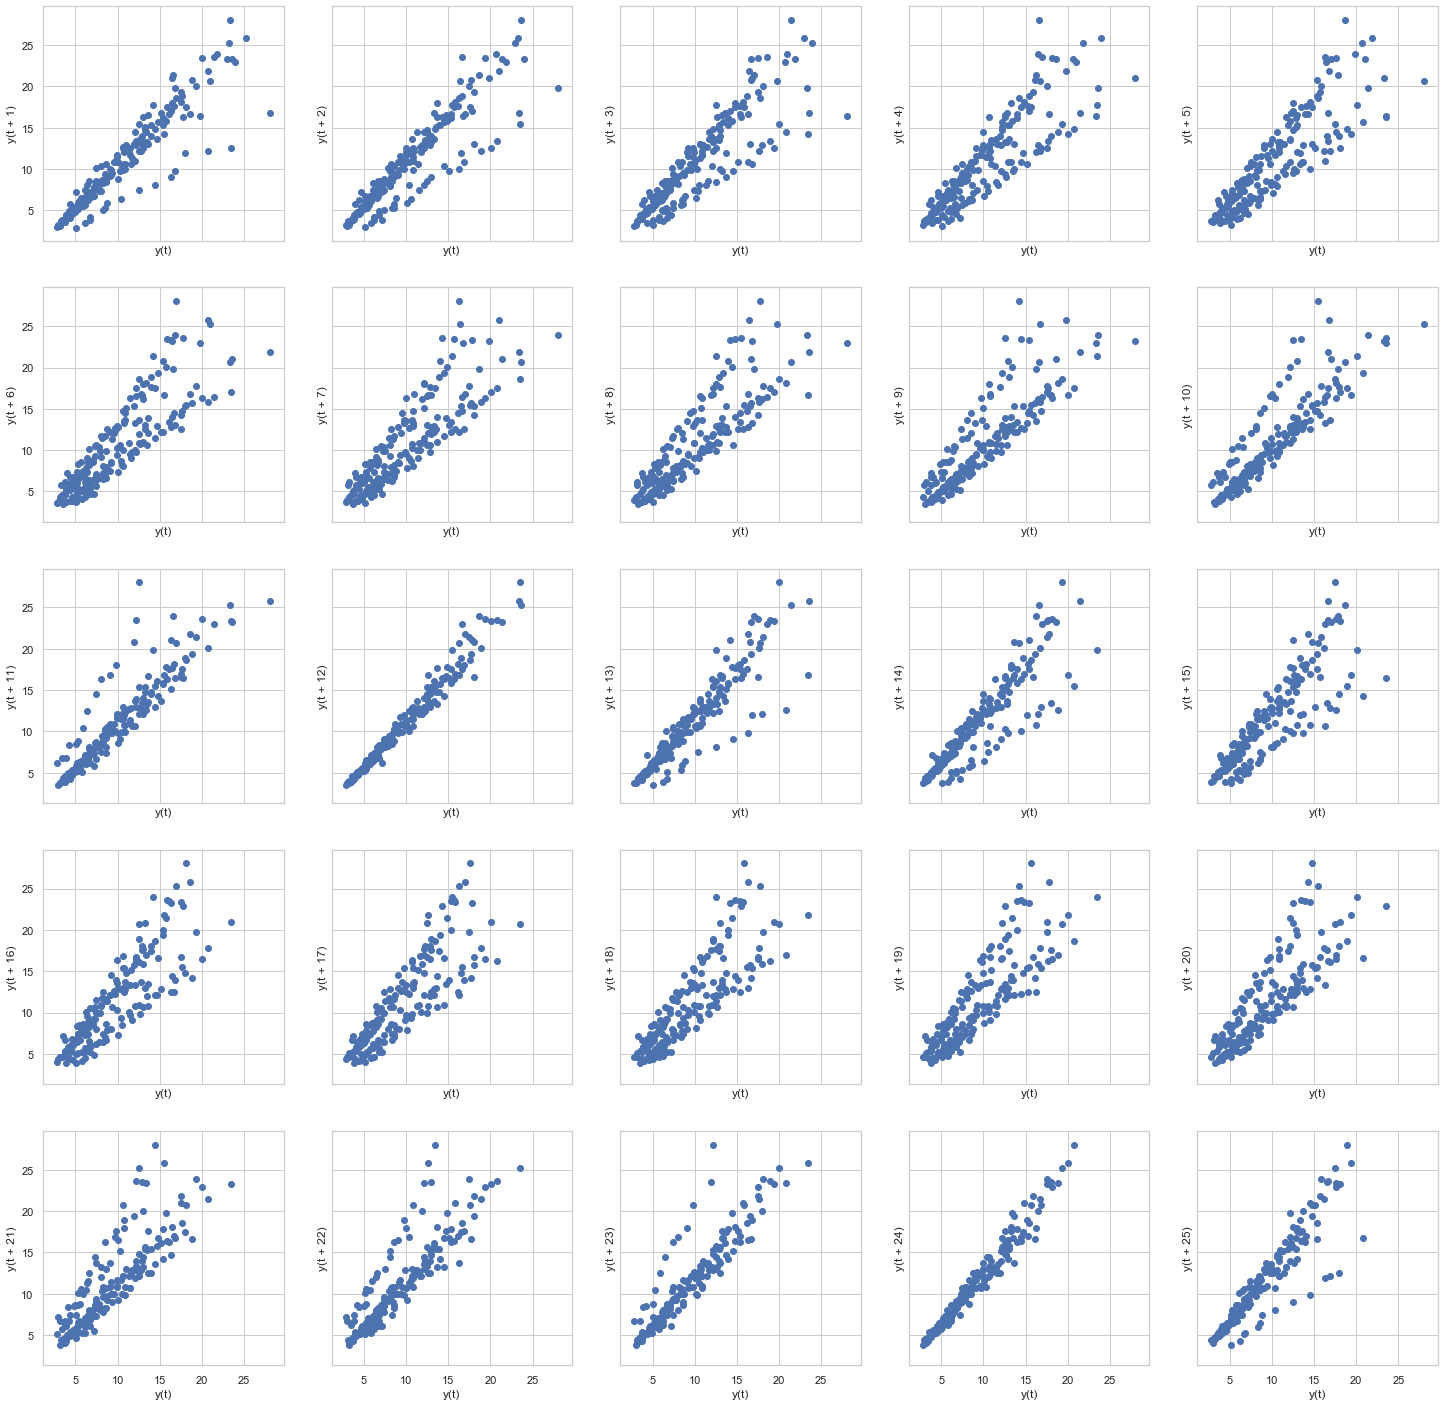

In [20]:
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts["y"], lag=count, ax=axes[i, j])
        count+=1

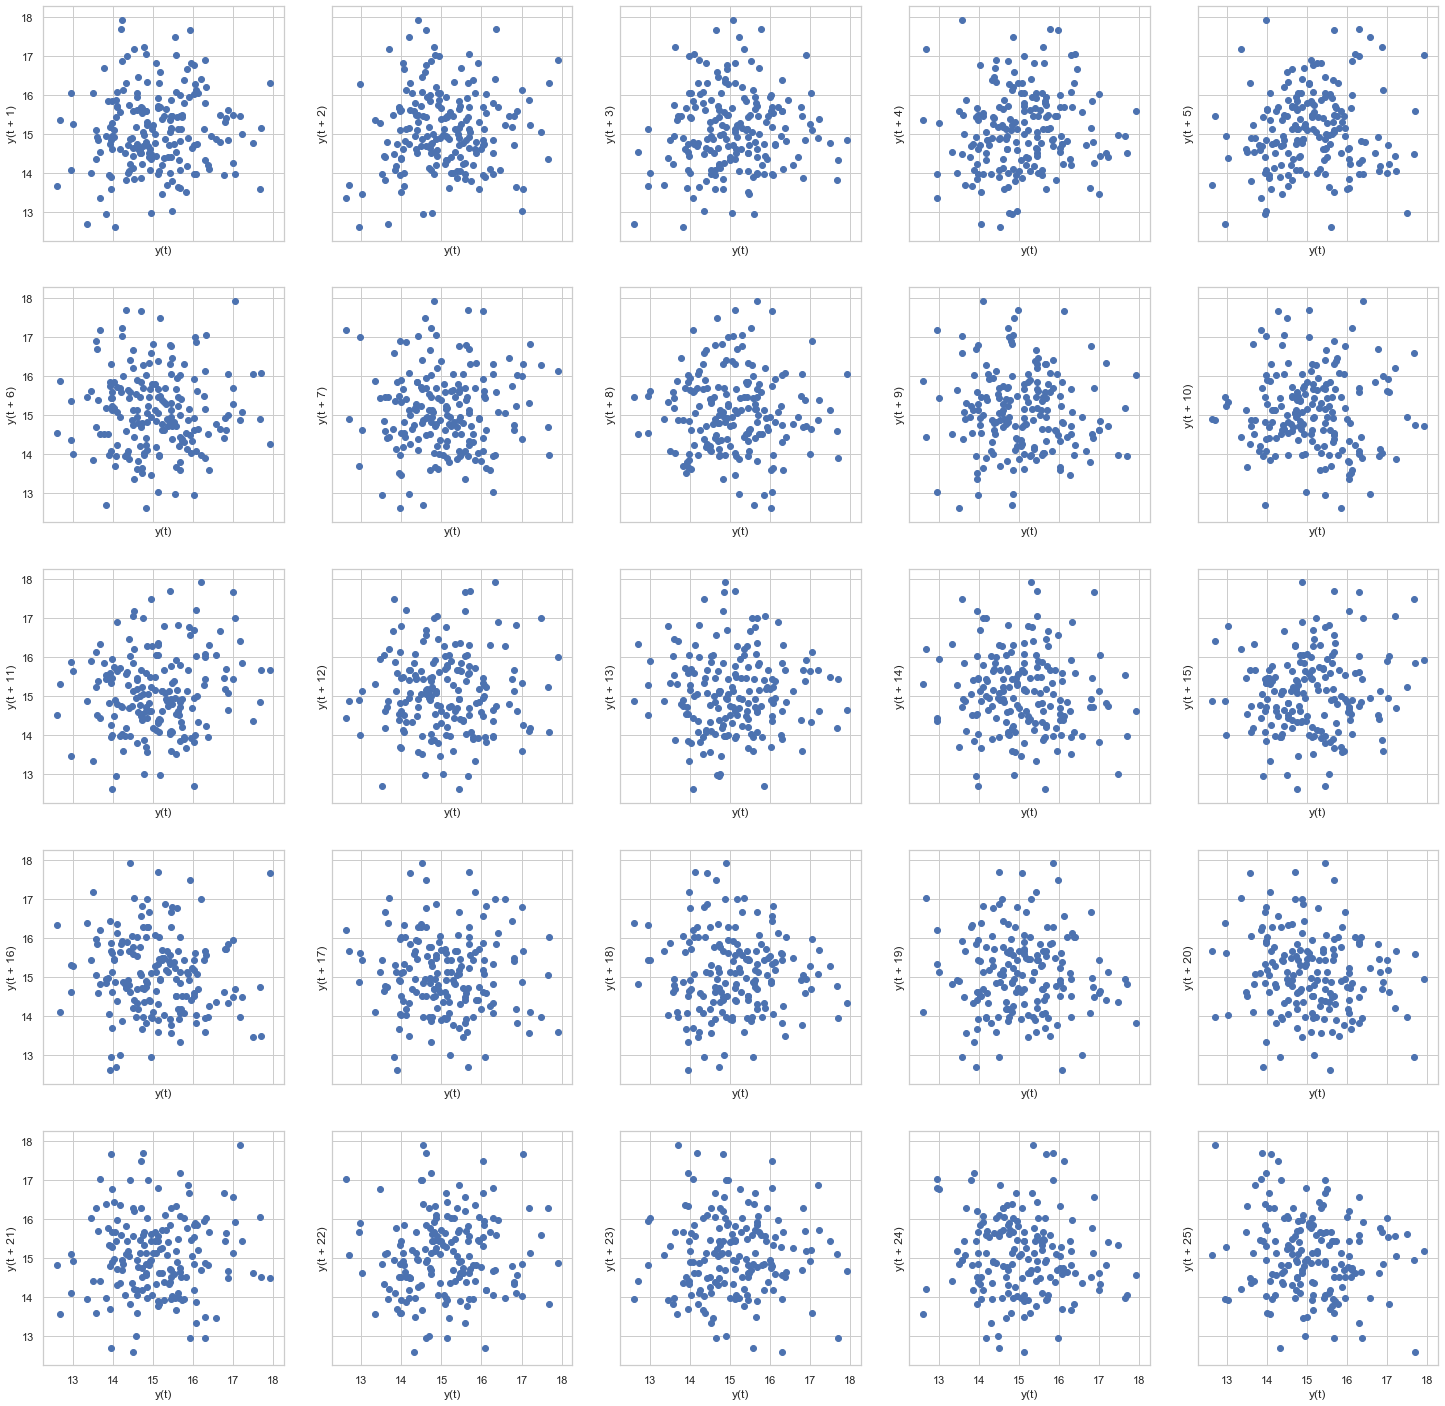

In [21]:
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts["level_series"], lag=count, ax=axes[i, j])
        count+=1